Predicting whether someone has diabetes based on other factors.

In [ ]:
# Importing libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Loading diabetes data into a dataframe called “diabetes_knn”
diabetes_knn = pd.read_csv('diabetes_data.csv')
# Setting option to display all columns without any restrictions on the number of columns displayed
pd.set_option('display.max_columns', None)

# Printing the dimensions of the "diabetes_knn" dataframe
print(diabetes_knn.shape)

# Creating the Feature Matrix and Target Vector
X = diabetes_knn.drop('Outcome', axis=1)
y = diabetes_knn['Outcome']

(768, 9)


In [ ]:
# Standardizing the attributes of Feature Matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting the Feature Matrix and Target Vector into train A (70%) and train B sets (30%).
# Using random_state=2024, and stratify based on Target vector
X_train_A, X_train_B, y_train_A, y_train_B = train_test_split(X_scaled, y, test_size=0.3, random_state=2024, stratify=y)

In [ ]:
# Initialize empty lists to store the scores for train A and train B
train_a_scores = []
train_b_scores = []

# Looping through k values from 1 to 9
for k in range(1, 10):
    # Creating a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fitting the model on the train A data
    knn.fit(X_train_A, y_train_A)
    # Calculating the accuracy score for train A and train B
    train_a_score = accuracy_score(y_train_A, knn.predict(X_train_A))
    train_b_score = accuracy_score(y_train_B, knn.predict(X_train_B))
    # Appending the scores to the lists
    train_a_scores.append(train_a_score)
    train_b_scores.append(train_b_score)

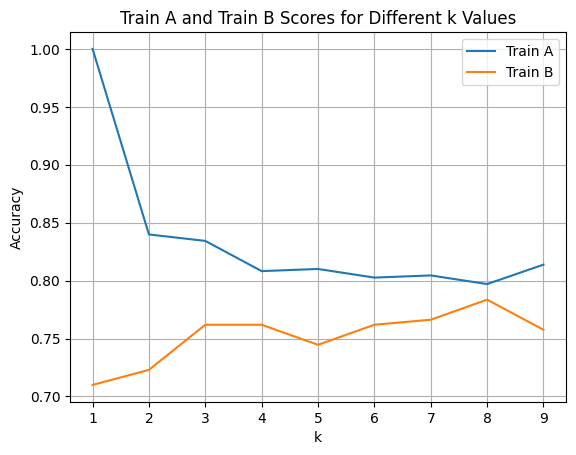

Best K is: 8


In [ ]:
# Plotting a graph of train A and train B score and determine the best value of k.
plt.plot(range(1, 10), train_a_scores, label="Train A")
plt.plot(range(1, 10), train_b_scores, label="Train B")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Train A and Train B Scores for Different k Values")
plt.legend()
plt.grid(True)
plt.show()


# Determining the best value of k
best_k = train_b_scores.index(max(train_b_scores)) + 1
print("Best K is:", best_k)

Best KNN Model Score for Train B set: 0.7835497835497836
[[133  17]
 [ 33  48]]


<Figure size 800x600 with 0 Axes>

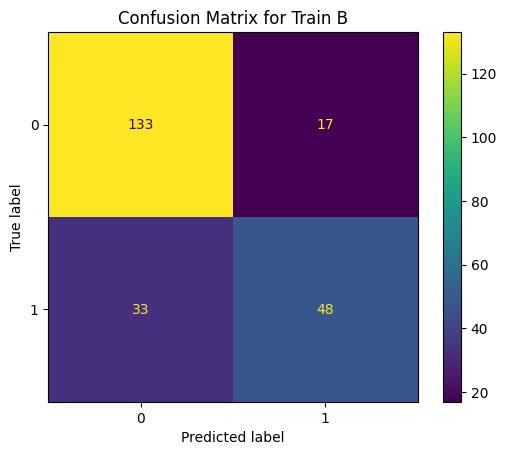

In [ ]:
# Displaying the score of the model with best value of k. Also print and plot the confusion matrix
# for Train B, using Train A set as the reference set for training.

# Creating a KNN classifier with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
# Fitting the model on the train A data
best_knn.fit(X_train_A, y_train_A)
# Calculating the score for the best model on train B
best_score = accuracy_score(y_train_B, best_knn.predict(X_train_B))
# Printing the score
print("Best KNN Model Score for Train B set:", best_score)

# Predicting the class labels for train B
y_pred_B = best_knn.predict(X_train_B)

# Calculating the confusion matrix for train B
cm = confusion_matrix(y_train_B, y_pred_B)
print(cm)

# Creating ConfusionMatrixDisplay instance with the confusion matrix and classifier classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(values_format='d', cmap='viridis')
plt.title('Confusion Matrix for Train B')
plt.show()

In [ ]:
# Predict the Outcome for a person with pregnancies=1, glucose=150, blood pressure=60, skin thickness=12,
# insulin=300, BMI=28, diabetes pedigree=0.4, age=45.

# Creating a dictionary with the features of the individual to predict diabetes outcome
diabetes_features = {
    'Pregnancies': [1],
    'Glucose': [150],
    'BloodPressure': [60],
    'SkinThickness': [12],
    'Insulin': [300],
    'BMI': [28],
    'DiabetesPedigreeFunction': [0.4],
    'Age': [45]
}

# Creating dataframe with the data of the individual
individual_to_classify_df = pd.DataFrame(diabetes_features)

# Standardizing the new observation using the same scaler used on the training data
new_observation_scaled = scaler.transform(individual_to_classify_df)

# Predicting the outcome for the new person data
predicted_outcome = best_knn.predict(new_observation_scaled)

# Printing the outcome prediction
print(f"The model predicts an outcome of {predicted_outcome} for the individual, suggesting {'diabetes' if predicted_outcome == 1 else 'no diabetes'}.")

The model predicts an outcome of [1] for the individual, suggesting diabetes.
